# K-Nearest Neighbours

		
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Algorithm: 
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.

Most Popular distance functions are:

<img src="img/KNN_similarity.png">



### Reference: 

Regressor:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

Classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

---

## Activity 1: Classification

## Dataset - Universal Bank Dataset

Background:							
							
A relatively young bank is growing rapidly in terms of overall customer acquisition. Majority of these are Liability customers with varying sizes of relationship with the bank. The customer base of Asset customers is quite small, and the bank WANTS to grow	this base rapidly to bring in more loan business. Specifically, it wants to explore ways of converting its liability customers to Personal Loan customers.							
							
A campaign the bank ran for liability customers last year showed a healthy conversion rate of over 9% successes. This has encouraged the Retail Marketing department to devise smarter campaigns with better target marketing.							

* Analytics Objective:							

Predict whether a given customer accepts his/her personal loan offer based on the Universal Bank dataset. There are a total of 5,000 customers in the data set and 14 variables. A brief description of the 14 variables is given below:

ID: Customer ID 

Age: Customer's age in completed year 

Experience: # of years of professional experience 

Income: Annual income of the customer ($000) 

ZIPcode: Home address ZIP code 

Family: Family size of the customer 

CCAvg: Average monthly credit card spending ($000)

Education: Education level: 1: Undergrad; 2: Graduate; 3: Advanced/Professional 

Mortgage: Value of house mortgage, if any ($000)

Securities Acct: Does the customer have a securities account with the bank? 

CD Account: Does the customer have a certifcate of deposit (CD) account with the bank? 

Online: Does the customer use internet banking facilities? 

CreditCard: Does the customer use a credit card issued by the bank?

Personal loan: Did this customer accept the personal loan offered in the last campaign? 1 - yes; 0 - no (target variable)

#### Import all the required packages and classes

In [1]:
import os
import numpy as np
import pandas as pd
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read the UnivBank.csv file into a pandas dataframe

In [3]:
bank= pd.read_csv("UnivBank.csv", na_values = ["?", "#"])

#### Display the first 5 records

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0,0,0,0,1


#### Display the dimensions, column names and column datatypes

In [5]:
bank.shape

(5000, 14)

In [6]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
bank.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage             float64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

#### Check the summary (descriptive statistics) for all attributes

In [8]:
hbank.describe(include= 'all')

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4997.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.936440,1.881000,56.53272,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.746609,0.839869,101.73491,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.00000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.00000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.00000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Check the unique levels in the target attribute PersonalLoan and also check for the percentage distribution

In [8]:
print(bank['PersonalLoan'].value_counts())

0    4520
1     480
Name: PersonalLoan, dtype: int64


In [9]:
bank['PersonalLoan'].value_counts(normalize=True) * 100

0    90.4
1     9.6
Name: PersonalLoan, dtype: float64

#### Check the number of unique ZIP Codes present in the dataset 

In [10]:
print("The number of Unique ZIP Codes in the bank data set is",bank['ZIPCode'].nunique())
print("\n")
print(bank['ZIPCode'].value_counts())

The number of Unique ZIP Codes in the bank data set is 467


94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIPCode, Length: 467, dtype: int64


#### Remove the unncessary columns (ID and ZipCode)

In [11]:
bank= bank.drop(["ID", "ZIPCode"], axis =1)

In [12]:
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45,4,1.0,2,0.0,0,0,0,0,1


#### Check the count of Education values in each level

In [13]:
print("The number of values in different Education levels:\n")
print(bank['Education'].value_counts())

The number of values in different Education levels:

1    2096
3    1501
2    1403
Name: Education, dtype: int64


#### Check the count of Family values in each level

In [14]:
print("The number of values in different Family levels:\n")
print(bank['Family'].value_counts())

The number of values in different Family levels:

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


#### Convert the attributes to the right data type based on the dataset description

In [15]:
cat_attr=['Education', 'Family', 'CDAccount', 'Online','CreditCard','SecuritiesAccount']

for cols in cat_attr:
    bank[cols] = bank[cols].astype('category')

In [16]:
bank.dtypes

Age                     int64
Experience              int64
Income                  int64
Family               category
CCAvg                 float64
Education            category
Mortgage              float64
PersonalLoan            int64
SecuritiesAccount    category
CDAccount            category
Online               category
CreditCard           category
dtype: object

#### Creating dummy variables

If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. 
So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category.


In [17]:
bank = pd.get_dummies(columns = cat_attr, data= bank, drop_first= True)

In [18]:
bank.head()

,Age,Experience,Income,CCAvg,Mortgage,PersonalLoan,Education_2,Education_3,Family_2,Family_3,Family_4,CDAccount_1,Online_1,CreditCard_1,SecuritiesAccount_1
0,25,1,49,1.6,0.0,0,0,0,0,0,1,0,0,0,1
1,45,19,34,1.5,0.0,0,0,0,0,1,0,0,0,0,1
2,39,15,11,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0.0,0,1,0,0,0,0,0,0,0,0
4,35,8,45,1.0,0.0,0,1,0,0,0,1,0,0,1,0


####  Check for missing values 

In [19]:
bank.isnull().sum()

Age                    0
Experience             0
Income                 0
CCAvg                  3
Mortgage               3
PersonalLoan           0
Education_2            0
Education_3            0
Family_2               0
Family_3               0
Family_4               0
CDAccount_1            0
Online_1               0
CreditCard_1           0
SecuritiesAccount_1    0
dtype: int64

#### Split the data into train and test

In [20]:
y=bank["PersonalLoan"]
X=bank.drop('PersonalLoan', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)  

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000,)
(1000,)


In [22]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3616
1     384
Name: PersonalLoan, dtype: int64
0    904
1     96
Name: PersonalLoan, dtype: int64


In [23]:
y_train.value_counts(normalize=True) * 100

0    90.4
1     9.6
Name: PersonalLoan, dtype: float64

In [24]:
y_test.value_counts(normalize=True) * 100

0    90.4
1     9.6
Name: PersonalLoan, dtype: float64

#### Split the attributes into numerical and categorical types

In [25]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

In [26]:
cat_attr = X_train.select_dtypes('category').columns
cat_attr

Index([], dtype='object')

#### Checking for missing values in train and test dataset

In [27]:
X_train.isnull().sum()

Age                    0
Experience             0
Income                 0
CCAvg                  3
Mortgage               2
Education_2            0
Education_3            0
Family_2               0
Family_3               0
Family_4               0
CDAccount_1            0
Online_1               0
CreditCard_1           0
SecuritiesAccount_1    0
dtype: int64

In [28]:
X_test.isnull().sum()

Age                    0
Experience             0
Income                 0
CCAvg                  0
Mortgage               1
Education_2            0
Education_3            0
Family_2               0
Family_3               0
Family_4               0
CDAccount_1            0
Online_1               0
CreditCard_1           0
SecuritiesAccount_1    0
dtype: int64

#### Imputing missing values with median

In [29]:
imputer = SimpleImputer(strategy='median')

imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_test[num_attr] = imputer.transform(X_test[num_attr])

In [30]:
imputer.statistics_

array([45. , 20. , 63.5,  1.5,  0. ])

In [31]:
X_train.isnull().sum()

Age                    0
Experience             0
Income                 0
CCAvg                  0
Mortgage               0
Education_2            0
Education_3            0
Family_2               0
Family_3               0
Family_4               0
CDAccount_1            0
Online_1               0
CreditCard_1           0
SecuritiesAccount_1    0
dtype: int64

In [32]:
X_test.isnull().sum()

Age                    0
Experience             0
Income                 0
CCAvg                  0
Mortgage               0
Education_2            0
Education_3            0
Family_2               0
Family_3               0
Family_4               0
CDAccount_1            0
Online_1               0
CreditCard_1           0
SecuritiesAccount_1    0
dtype: int64

#### Standardize the data (numerical attributes only) - Import StandardScaler


In [33]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [34]:
scaler.mean_

array([45.3095   , 20.0785   , 74.0235   ,  1.9468125, 56.8095   ])

In [35]:
scaler.var_

array([1.29667710e+02, 1.29770338e+02, 2.16360295e+03, 3.11058541e+00,
       1.03160472e+04])

In [36]:
X_train[num_attr]= scaler.transform(X_train[num_attr])
X_test[num_attr]= scaler.transform(X_test[num_attr])

#### Build KNN Classifier Model

In [37]:
model= KNeighborsClassifier(n_neighbors=5,metric="euclidean")
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

#### Predict on the Test data

In [39]:
y_pred = model.predict(X_test)


#### FIne the accuracy classification score

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.94


### Finding out the IDEAL K-value for the given dataset

### Method-1

In [41]:
# Creating list of different K values for KNN
myList = list(range(2,12))

# Empty list that will hold cv scores
cv_scores = []

# Perform 5-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # print("scores=",scores)
    cv_scores.append(scores.mean())
    # print("cv_scores=",cv_scores)

In [42]:
cv_scores

[0.9397487124979882,
 0.9494990300766094,
 0.9372508980482781,
 0.9465002792973115,
 0.9352502699222967,
 0.9427499632811926,
 0.9347499578124341,
 0.9387502722660503,
 0.9339999570311829,
 0.9367496472650739]

The optimal number of neighbors is 3


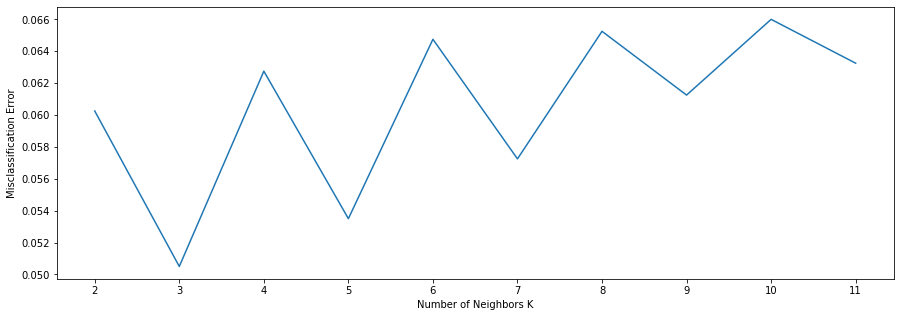

In [43]:
# Changing to misclassification error
MCE = [1 - x for x in cv_scores]

# Determining best k
optimal_k = myList[MCE.index(min(MCE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,5))
plt.plot(myList, MCE)

plt.xticks(np.arange(2, 12, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Method-2: GridSearch Cross validation

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance. 

While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training

### K-fold Cross Validation:

#### 1. Use the GridSearchCV 

In [44]:
parameters = {'n_neighbors':list(range(2,12))}

clf = GridSearchCV(KNeighborsClassifier(metric="euclidean", n_jobs=-1),
                   parameters,verbose=1, cv=5)

clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [45]:
knn_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9495 {'n_neighbors': 3}


#### 2. Predict on the test data using the best model

In [46]:
y_pred_test=knn_model.predict(X_test)

#### 3. Compute confusion matrix to evaluate the accuracy of the classification 

In [47]:
print(confusion_matrix(y_test, y_pred_test))

[[896   8]
 [ 42  54]]


#### 4. Accuracy classification score

In [48]:
print(accuracy_score(y_test,y_pred_test))

0.95


## Activity 2: Regression 

##### Error Metrics for Regression


* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times\sum_{i = 1}^{n}|y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2}$$

#### 1. Import KNeighborsRegressor (from Sklearn)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

#### 2. Randomly generate a dataframe of 1000 rows and 4 columns. Consider the 3 columns as the independent variables and the 4th column as Target

In [50]:
data  = pd.DataFrame(np.random.randint(1,50,size=(1000, 4)), columns=list('ABCT'))

#### 3. Displaying the first 5 recods

In [51]:
data.head()

,A,B,C,T
0,23,38,2,29
1,7,13,13,15
2,36,38,3,23
3,16,45,23,48
4,43,32,29,35


#### 4. Split the data into train and test using the train_test_split() function.

In [52]:
train, test = train_test_split(data, test_size=0.2,random_state=123)
print(train.shape, test.shape)

(800, 4) (200, 4)


#### 5. Extract the target column from train and test datasets

In [53]:
y_train = train["T"]

In [54]:
y_test = test["T"]

#### 6. Normalize the independent variables using MinMaxScaler() in both train and test

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train.iloc[:,:3])

X_train = pd.DataFrame(scaler.transform(train.iloc[:,:3]), columns=list("abc"))
X_test = pd.DataFrame(scaler.transform(test.iloc[:,:3]), columns=list("abc"))

#### 7. Displaying the first 5 records from the normalized data

In [56]:
print(X_train.head(5))
print(X_test.head(5))

          a         b         c
0  0.895833  0.312500  0.458333
1  0.270833  0.854167  0.791667
2  0.270833  0.583333  0.750000
3  1.000000  0.958333  0.645833
4  0.916667  0.708333  0.875000
          a         b         c
0  0.562500  0.312500  0.375000
1  0.250000  0.916667  0.645833
2  0.333333  0.833333  0.791667
3  0.145833  0.000000  0.166667
4  0.250000  0.520833  0.791667


#### 8. Build the KNN Regression Model

In [57]:
knn = KNeighborsRegressor(algorithm='brute',n_neighbors=5, metric = "euclidean")
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [58]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [59]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

The Mean Absolute Error on train dataset: 10.593249999999998 

The Mean Absolute Error on test dataset: 12.932 

The Mean Squared Error on train dataset: 157.63694999999998 

The Mean Squared Error on test dataset: 232.858 

The Root Mean Squared Error on train dataset: 12.55535543105013 

The Root Mean Squared Error on test dataset: 15.25968544892063 



In [60]:
# Check for sklearn version (SimpleImputer)
import sklearn
print(sklearn.__version__)

0.21.1


In [61]:
# To upgrade scikit-learn to the latest version, run below command in Anaconda prompt:
# conda update scikit-learn
# pip install -U scikit-learn
# Refer "https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html" for help on SimpleImputer